In [3]:
#회귀
import matplotlib.pyplot as plt
from random import *
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
# ~Classfier 분류 모델  ~Regressor 회귀모델

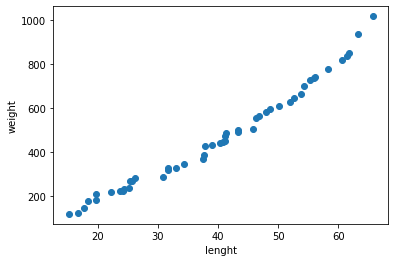

In [4]:
perch_length = [round(random(),2)*10 + 10 + i  for i in range(1,50)]
perch_length.sort()
perch_weight = [randint(50,100) * randint(1,10) + i for i in perch_length]
perch_weight.sort()

perch_length = np.array(perch_length)
perch_weight = np.array(perch_weight)

plt.scatter(perch_length,perch_weight)

plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

In [5]:
train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight,random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print('train_input : ',train_input)
print('test_input : ',test_input)

train_input :  [[24.1]
 [18.4]
 [22.2]
 [55.4]
 [56. ]
 [61.9]
 [31.6]
 [24.3]
 [31.6]
 [40.8]
 [48. ]
 [45.9]
 [15.1]
 [58.4]
 [46.9]
 [19.6]
 [43.4]
 [25.4]
 [52. ]
 [16.6]
 [37.9]
 [17.7]
 [52.7]
 [50.1]
 [40.4]
 [54.3]
 [25.1]
 [39. ]
 [34.4]
 [65.8]
 [37.6]
 [23.6]
 [56.2]
 [30.8]
 [43.3]
 [53.9]]
test_input :  [[26.1]
 [61.5]
 [63.4]
 [60.7]
 [33. ]
 [41.3]
 [41.2]
 [41.1]
 [46.3]
 [37.5]
 [25.7]
 [19.6]
 [48.6]]


In [6]:
knr = KNeighborsRegressor()
knr.fit(train_input,train_target)

result = knr.score(test_input,test_target)
print('result : ',result)

from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target,test_prediction)
# 평균적으로 얼마나 차이가 나는지
print('mae : ',mae)

result :  0.9722765260943742
mae :  26.364615384615384


In [7]:
# 과대적합 과 과소 적합
train = knr.score(train_input,train_target)
print('train : ',train)
test = knr.score(test_input,test_target)
print('test : ',test)

train :  0.9735566892275049
test :  0.9722765260943742


train :  0.9850864577994874
test :  0.9845165225038154
try_test :  882.2666666666665


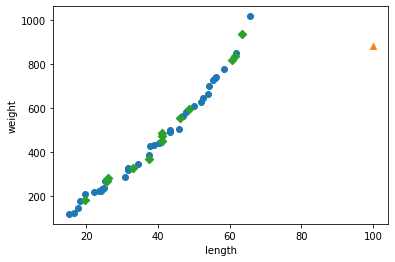

In [8]:
#  이웃 개수가 적어지면 과대 적합   많아지면 과소적합
knr.n_neighbors = 3
knr.fit(train_input,train_target)

train = knr.score(train_input,train_target)
print('train : ',train)
test = knr.score(test_input,test_target)
print('test : ',test)

[try_test] = knr.predict([[100]])
print('try_test : ',try_test) 

plt.scatter(train_input,train_target)
plt.scatter(100,try_test,marker='^')
plt.scatter(test_input,test_target,marker='D')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 트레이닝 범위를 벋어나면 이상한 값을 가지게 된다. 
# 이유는 가장 가까운 값의 평균이기 때문에 트레이닝된 범위 에서만 사용 가능한 알고리즘이다. 

# 선형 회귀

LinearRegression

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# 선형 회기 모델 훈련
lr.fit(train_input,train_target)

# 50cm 농어에 대한 예측
print(lr.predict([[50]]))
#      기울기  ,    y절편
# 농어무게 = 기울기(a) * 농어길이 + 절편(b)
print(lr.coef_,lr.intercept_)

[626.97693815]
[15.57074518] -151.5603207684909


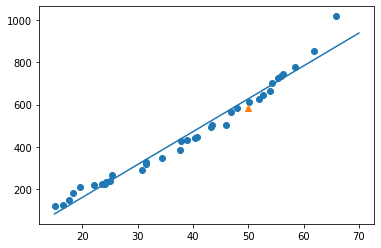

0.9735037319624313
0.9693130019905691


In [10]:
# 학습한 직선 그리기

# 훈련 세트의 산점도를 그리기
plt.scatter(train_input,train_target)

# 15 에서 50까지 1차 방정식 그래프를 그립니다.
plt.plot([15,70],[15*lr.coef_ + lr.intercept_,70*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50,585.3,marker='^')
plt.show()

print(lr.score(train_input,train_target))

print(lr.score(test_input,test_target))

In [11]:
# 다항 회귀

# 무게 = 기울기(제곱된 길이의 기울기) * 길이**2 + 기울기 * 길이 + 절편
# lr = LinearRegression()
train_poly = np.column_stack((train_input ** 2,train_input))
test_poly = np.column_stack((test_input ** 2 ,test_input))

lr.fit(train_poly,train_target)

print(lr.predict([[50**2 , 50]]))

print(lr.coef_,lr.intercept_)
# 무게 = 0.07 * 길이**2 - 6.69 * 길이 + 55.47

[612.62603515]
[0.17479198 2.02240771] 74.52570830448462


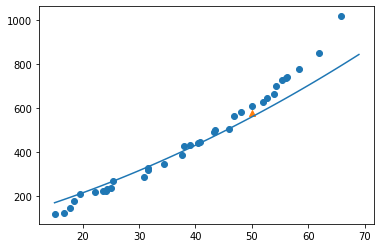

0.9935263926469422
0.9910094722529665


In [12]:
# 학습한 직선 그리기

# 구간별 직선을 그리기 위해 15에서 49까지  정수 배열을 만든다.
point = np.arange(15,70)

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input,train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다.
plt.plot(point,  0.07 * point**2 + 6.6 * point + 55.4)

# 50cm 농어 데이터 
plt.scatter([50],[577.13],marker='^')
plt.show()

print(lr.score(train_poly,train_target))

print(lr.score(test_poly,test_target))

# 특성 공학 과 규제

In [20]:
# 다중 회귀  multiple regression
#  판다스로 데이터 준비 - 데이터 프레임 DataFrame

import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
# print(perch_full)

perch_full = np.array(perch_full)
# print(len(perch_full))

# 리스트 합치기 길이 와 높이 
perch_input = np.column_stack((perch_full[:,0] , perch_full[:,1]))
# 두께
perch_data = perch_full[:,2]

# print(perch_input)
# print(perch_data)

train_input,test_input,train_target,test_target = train_test_split(perch_input,perch_data,random_state=42)
print('train_input :',train_input)
print('test_input : ',test_input)
print('train_target : ',train_target)
print('test_target : ',test_target)

# 길이 높이 두께

train_input : [[19.6   5.14]
 [22.    5.88]
 [18.7   5.2 ]
 [17.4   4.59]
 [36.   10.61]
 [25.    6.44]
 [40.   11.93]
 [39.   12.43]
 [43.   11.93]
 [22.    5.64]
 [20.    5.08]
 [22.    6.11]
 [24.    7.29]
 [27.5   7.17]
 [43.   12.51]
 [40.   11.73]
 [24.    6.38]
 [21.    5.92]
 [27.5   7.05]
 [40.   12.38]
 [32.8  10.03]
 [26.5   7.17]
 [36.5  10.88]
 [13.7   3.53]
 [22.7   5.95]
 [15.    3.82]
 [37.   10.57]
 [35.   11.49]
 [28.7   7.59]
 [23.5   6.28]
 [39.   11.14]
 [21.    5.69]
 [23.    5.22]
 [22.    5.52]
 [44.   12.49]
 [22.5   6.79]
 [19.    5.64]
 [37.   10.84]
 [22.    6.11]
 [25.6   6.56]
 [42.   12.8 ]
 [34.5  10.26]]
test_input :  [[ 8.4   2.11]
 [18.    5.22]
 [27.5   7.28]
 [21.3   6.38]
 [22.5   5.86]
 [40.   11.14]
 [30.    7.62]
 [24.6   6.73]
 [39.   11.14]
 [21.    5.69]
 [43.5  12.6 ]
 [16.2   4.59]
 [28.    7.82]
 [27.3   8.32]]
train_target :  [3.04 3.52 3.12 2.94 6.74 3.68 7.11 7.35 7.28 3.52 2.77 3.52 3.72 4.34
 7.42 7.22 3.82 3.31 4.34 7.46 6.02 4.14 6.

In [21]:
# 다항 특성 만들기 
from sklearn.preprocessing import PolynomialFeatures

# degree =2
poly = PolynomialFeatures()
poly.fit([[2,3]])

# 1(bias), 2,3,2**2,2*3,3**2
print(poly.transform([[2,3]]))


[[1. 2. 3. 4. 6. 9.]]


In [22]:
# LinearRegression

poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape)

poly.get_feature_names()

test_poly = poly.transform(test_input)

(42, 5)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly,train_target)

print(lr.score(train_poly,train_target))

print(lr.score(test_poly,test_target))

0.9745416941882158
0.9551003029954536


In [24]:
# 더 많은 특성 만들기

poly = PolynomialFeatures(degree=5,include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

lr.fit(train_poly,train_target)

print(lr.score(train_poly,train_target))

print(lr.score(test_poly,test_target))

(42, 20)
0.9913857513726401
0.11999292885942914


In [25]:
# 규제 전에 표준화

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

print(train_scaled)
print(test_scaled)

[[-1.01339619 -1.01007487 -0.9549757  -0.9496784  -0.93942079 -0.88757122
  -0.88399964 -0.87785292 -0.8691891  -0.82233944 -0.82171953 -0.81928269
  -0.81486775 -0.80835934 -0.7637909  -0.76597773 -0.76668667 -0.76571689
  -0.76290623 -0.75814062]
 [-0.73842893 -0.75254307 -0.76472563 -0.7717585  -0.7747325  -0.76291014
  -0.76770896 -0.7701438  -0.7701077  -0.74414953 -0.74888304 -0.75182759
  -0.75276277 -0.75151822 -0.71646953 -0.72192479 -0.72588462 -0.72812394
  -0.72845668 -0.72674557]
 [-1.11650891 -0.98919391 -1.02065999 -0.9714645  -0.92689165 -0.92715994
  -0.90484569 -0.88325413 -0.86212687 -0.84515835 -0.83603176 -0.82638952
  -0.81597363 -0.80456916 -0.77647055 -0.7747107  -0.77201712 -0.76815525
  -0.76292803 -0.75618509]
 [-1.26544951 -1.20148364 -1.11008743 -1.0794873  -1.04749571 -0.97797552
  -0.96206357 -0.94494104 -0.92657374 -0.87277966 -0.86595922 -0.85791159
  -0.84844182 -0.83740083 -0.79094785 -0.79002471 -0.78789053 -0.78433109
  -0.77917142 -0.772285  ]
 [ 0

In [26]:
# 릿지 회귀

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled,train_target)

print(ridge.score(train_scaled,train_target))

print(ridge.score(test_scaled,test_target))

0.9714635905358158
0.961773334536528


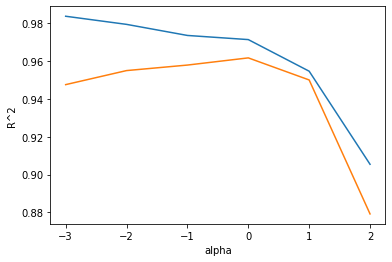

In [29]:
# 적절한 규제 강도 찾기

alpha_list = [0.001,0.01,0.1,1,10,100]
train_score=[]
test_score=[]
for alpha in alpha_list:
  # 릿지 모델을 만듭니다.
  ridge = Ridge(alpha=alpha)
  # 릿지 모델을 훈련합니다.
  ridge.fit(train_scaled,train_target)
  # 훈련 점수와 테스트 점수를 저장합니다.
  train_score.append(ridge.score(train_scaled,train_target))
  test_score.append(ridge.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [30]:
ridge = Ridge(alpha =0.1)
ridge.fit(train_scaled,train_target)

print(ridge.score(train_scaled,train_target))

print(ridge.score(test_scaled,test_target))

0.9736565382700112
0.957968129407248


In [31]:
# 라쏘 회귀

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled,train_target)

print(lasso.score(train_scaled,train_target))

print(lasso.score(test_scaled,test_target))


0.6380277931064858
0.6025658372680047


In [33]:
lass = Lasso(alpha=10)
lasso.fit(train_scaled,train_target)

print(lasso.score(train_scaled,train_target))

print(lasso.score(test_scaled,test_target))

print(np.sum(lasso.coef_ == 0))

0.6380277931064858
0.6025658372680047
19
